<a href="https://colab.research.google.com/github/iluv4/credit-card-data-analysis/blob/main/%ED%95%9C%ED%98%84%EB%AF%BC_%EC%97%B0%EC%B2%B4%EC%9C%A8_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: /content/card_test (2).csv mount this file

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
pd.read_csv('/content/drive/My Drive/card_test.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID
0,7040,5,자동이체,회사,우편,우편,1,1,1,13419,...,0,0,4,3,0,0,5,1회 이상,1일 이상,TRAIN_291453
1,15328,27,자동이체,주거지,우편,우편,1,1,1,8624,...,0,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_104115
2,7579,15,자동이체,주거지,우편,우편,1,1,1,7984,...,0,0,1,3,0,0,0,10회 이상,10일 이상,TRAIN_129210
3,29053,13,자동이체,미확인,이메일,이메일,1,1,1,2422,...,2,0,0,5,0,0,0,10회 이상,10일 이상,TRAIN_194246
4,17086,27,자동이체,주거지,우편,우편,1,1,1,5807,...,0,0,0,2,0,0,0,1회 이상,1일 이상,TRAIN_183742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,56019,27,자동이체,주거지,우편,우편,0,0,0,0,...,0,0,0,3,0,0,0,15회 이상,10일 이상,TRAIN_141071
1436,4555,23,자동이체,주거지,우편,우편,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_202449
1437,15529,13,자동이체,주거지,우편,우편,1,1,1,4264,...,0,0,0,3,0,0,0,1회 이상,1일 이상,TRAIN_304936
1438,65885,25,자동이체,주거지,우편,우편,1,1,1,154,...,0,0,0,3,0,0,4,1회 이상,1일 이상,TRAIN_208688


In [ ]:
# Load the dataframe (assuming df is already loaded from the previous step)
df = pd.read_csv('/content/drive/My Drive/card_test.csv')

# Select the key columns for analysis
key_columns = [
    '남녀구분코드',
    '상환개월수_결제일_R6M',
    '선결제건수_R6M',
    '카드이용한도금액',
    '연체건수_R3M',
    '포인트_이용포인트_R12M',
    '할인금액_R3M',
    '이용금액_카드론_R3M',
    'RV최소결제비율',
    '한도증액금액_R12M'
]

# Check if all key columns exist in the DataFrame
missing_key_columns = [col for col in key_columns if col not in df.columns]
if missing_key_columns:
    print(f"Warning: The following key columns are not found in the DataFrame: {missing_key_columns}")
    # Filter key_columns to only include existing ones
    key_columns = [col for col in key_columns if col in df.columns]

# Select the subset of the dataframe with key columns
df_key = df[key_columns]

# Display descriptive statistics for the key columns
print("Descriptive Statistics for Key Columns:")
display(df_key.describe())

# Check for missing values in the key columns
print("\nMissing Values in Key Columns:")
display(df_key.isnull().sum())

# Check for the target variable.
# Since the exact name is unknown, let's try some common names.
target_columns_to_check = ['연체여부', '연체', 'is_default', 'default']

found_target = False
for col in target_columns_to_check:
    if col in df.columns:
        print(f"\nFound potential target column: `{col}`")
        found_target = True
        break

if not found_target:
    print("\nCould not find a common target column ('연체여부', '연체', 'is_default', 'default').")
    print("Please specify the exact name of the target column for the classification task.")
    print("Available columns:")
    print(df.columns.tolist())

Descriptive Statistics for Key Columns:


,남녀구분코드,상환개월수_결제일_R6M,선결제건수_R6M,카드이용한도금액,연체건수_R3M,포인트_이용포인트_R12M,할인금액_R3M,이용금액_카드론_R3M,RV최소결제비율,한도증액금액_R12M
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.505556,3.906250,0.327083,54737.602083,0.178472,10239.377778,80.578472,104.022222,12.145809,0.120139
std,0.500143,2.422437,1.119957,49394.855234,0.599474,45459.864718,186.095586,2797.787533,4.110976,0.341903
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,19658.250000,0.000000,0.000000,0.000000,0.000000,9.999980,0.000000
50%,2.000000,5.000000,0.000000,45986.000000,0.000000,0.000000,0.000000,0.000000,9.999980,0.000000
75%,2.000000,6.000000,0.000000,85285.500000,0.000000,2315.000000,26.000000,0.000000,14.999970,0.000000
max,2.000000,6.000000,8.000000,217638.000000,4.000000,696860.000000,1125.000000,80405.000000,24.999950,2.000000



Missing Values in Key Columns:


,0
남녀구분코드,0
상환개월수_결제일_R6M,0
선결제건수_R6M,0
카드이용한도금액,0
연체건수_R3M,0
포인트_이용포인트_R12M,0
할인금액_R3M,0
이용금액_카드론_R3M,0
RV최소결제비율,0
한도증액금액_R12M,0



Could not find a common target column ('연체여부', '연체', 'is_default', 'default').
Please specify the exact name of the target column for the classification task.
Available columns:
['Unnamed: 0.1', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', '마일_적립포인트_R12M', '마일_적립포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '상환개월수_결제일_R6M', '상환개월수_결제일_R3M', '선결제건수_R6M', '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자', 'RV약정

Target column '회원여부_연체' found.
Attempting simple one-hot encoding for demonstration.
Applied one-hot encoding.

Handling missing values by filling with mean for numeric columns...
Missing values handled.

Splitting data into train and test sets with stratification...
Train set size: 1008
Test set size: 432
Train set target distribution:
회원여부_연체
0    0.987103
1    0.012897
Name: proportion, dtype: float64
Test set target distribution:
회원여부_연체
0    0.986111
1    0.013889
Name: proportion, dtype: float64

--- Training RandomForestClassifier WITHOUT class_weight ---

Evaluation WITHOUT class_weight:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       426
           1       0.00      0.00      0.00         6

    accuracy                           0.99       432
   macro avg       0.49      0.50      0.50       432
weighted avg       0.97      0.99      0.98       432


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Predicted 0,Predicted 1
Actual 0,426,0
Actual 1,6,0



AUC Score: 0.9982

--- Training RandomForestClassifier WITH class_weight='balanced' ---

Evaluation WITH class_weight='balanced':

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       426
           1       0.00      0.00      0.00         6

    accuracy                           0.99       432
   macro avg       0.49      0.50      0.50       432
weighted avg       0.97      0.99      0.98       432


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Predicted 0,Predicted 1
Actual 0,426,0
Actual 1,6,0



AUC Score: 0.9986

--- Training RandomForestClassifier with SMOTE on Training Data ---

Original training data shape: (1008, 2353)
Resampled training data shape: (1990, 2353)
Resampled training set target distribution:
회원여부_연체
0    0.5
1    0.5
Name: proportion, dtype: float64

Evaluation WITH SMOTE:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       426
           1       1.00      0.17      0.29         6

    accuracy                           0.99       432
   macro avg       0.99      0.58      0.64       432
weighted avg       0.99      0.99      0.98       432


Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,426,0
Actual 1,5,1



AUC Score: 0.9967

--- Plotting ROC Curves ---


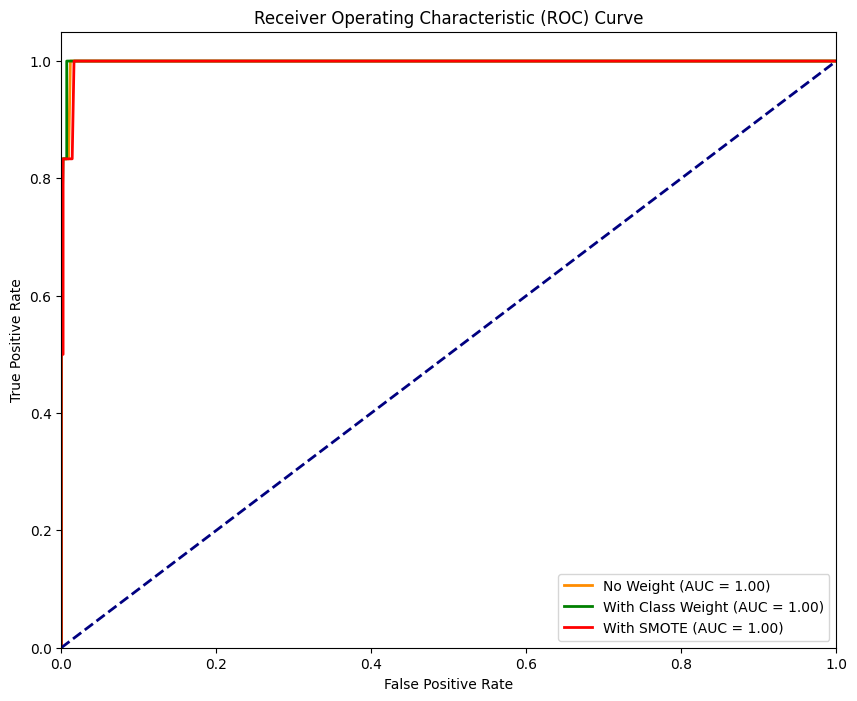

In [ ]:
# First, make sure you have scikit-learn installed
!pip install scikit-learn imbalanced-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Import display for Colab notebooks

# Assuming df is already loaded and contains the '회원여부_연체' column
# If df is not defined from previous steps, load it here:
try:
    df
except NameError:
    print("DataFrame 'df' not found. Loading from CSV...")
    df = pd.read_csv('/content/drive/My Drive/card_test.csv') # Adjust path if needed

# Define the target variable
target = '회원여부_연체'

# Check if the target column exists in the dataframe
if target not in df.columns:
    print(f"Error: Target column '{target}' not found in the DataFrame.")
    # Print available columns to help the user identify the correct target column
    print("Available columns:")
    print(df.columns.tolist())
else:
    print(f"Target column '{target}' found.")

    # Define features (X) and target (y)
    # Drop the target column and any other non-numeric/identifier columns from features
    # You may need to adjust columns_to_drop based on your dataset
    columns_to_drop = [target]
    # Add any other columns that are not features (e.g., ID columns)
    # Example: columns_to_drop.append('some_id_column')

    # Ensure columns_to_drop only contains columns that exist in df
    actual_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
    X = df.drop(columns=actual_cols_to_drop, errors='ignore')
    y = df[target]

    # --- Data Preprocessing (Handling Non-numeric Features) ---
    # Identify non-numeric columns
    non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns

    if len(non_numeric_cols) > 0:
        print(f"Warning: Found non-numeric columns in features: {list(non_numeric_cols)}")
        print("Attempting simple one-hot encoding for demonstration.")
        # Apply one-hot encoding
        X = pd.get_dummies(X, columns=non_numeric_cols, dummy_na=False)
        print("Applied one-hot encoding.")

    # --- Data Preprocessing (Handling Missing Values) ---
    # Simple imputation for numerical columns (fill with mean)
    # You might need a more sophisticated approach depending on your data
    print("\nHandling missing values by filling with mean for numeric columns...")
    numeric_cols = X.select_dtypes(include=['number']).columns
    X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
    print("Missing values handled.")

    # Verify no remaining missing values in X
    if X.isnull().sum().sum() > 0:
        print("Warning: Missing values still exist after simple imputation.")
        display(X.isnull().sum()[X.isnull().sum() > 0]) # Show columns with remaining NaNs

    # Verify no remaining missing values in y (should not have any if target was checked)
    if y.isnull().sum() > 0:
         print("Warning: Missing values found in target variable y.")
         display(y.isnull().sum()) # Show columns with remaining NaNs


    # --- Split Data ---
    # Use stratify to maintain the class distribution in train and test sets
    print("\nSplitting data into train and test sets with stratification...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    print(f"Train set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print(f"Train set target distribution:\n{y_train.value_counts(normalize=True)}")
    print(f"Test set target distribution:\n{y_test.value_counts(normalize=True)}")


    # --- Model Training (Without Class Weight) ---
    print("\n--- Training RandomForestClassifier WITHOUT class_weight ---")
    model_no_weight = RandomForestClassifier(n_estimators=100, random_state=42)
    model_no_weight.fit(X_train, y_train)

    # --- Evaluation (Without Class Weight) ---
    print("\nEvaluation WITHOUT class_weight:")
    y_pred_no_weight = model_no_weight.predict(X_test)
    y_proba_no_weight = model_no_weight.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_no_weight))

    # Confusion Matrix
    cm_no_weight = confusion_matrix(y_test, y_pred_no_weight)
    print("\nConfusion Matrix:")
    display(pd.DataFrame(cm_no_weight, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

    # AUC Score
    try:
        auc_no_weight = roc_auc_score(y_test, y_proba_no_weight)
        print(f"\nAUC Score: {auc_no_weight:.4f}")
    except ValueError as e:
        print(f"\nCould not calculate AUC: {e}")
        print("This might happen if the test set contains only one class after splitting, which is unlikely with stratification but possible with extremely small datasets.")

    # --- Model Training (With Class Weight) ---
    print("\n--- Training RandomForestClassifier WITH class_weight='balanced' ---")
    model_with_weight = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model_with_weight.fit(X_train, y_train)

    # --- Evaluation (With Class Weight) ---
    print("\nEvaluation WITH class_weight='balanced':")
    y_pred_with_weight = model_with_weight.predict(X_test)
    y_proba_with_weight = model_with_weight.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_with_weight))

    # Confusion Matrix
    cm_with_weight = confusion_matrix(y_test, y_pred_with_weight)
    print("\nConfusion Matrix:")
    display(pd.DataFrame(cm_with_weight, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

    # AUC Score
    try:
        auc_with_weight = roc_auc_score(y_test, y_proba_with_weight)
        print(f"\nAUC Score: {auc_with_weight:.4f}")
    except ValueError as e:
        print(f"\nCould not calculate AUC: {e}")
        print("This might happen if the test set contains only one class after splitting, which is unlikely with stratification but possible with extremely small datasets.")

    # --- Optional: Using SMOTE (Alternative Imbalance Handling) ---
    # SMOTE is applied *only* to the training data to prevent data leakage
    print("\n--- Training RandomForestClassifier with SMOTE on Training Data ---")

    # Ensure SMOTE is not applied if there's only one class in the training data
    if len(y_train.value_counts()) > 1:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        print(f"\nOriginal training data shape: {X_train.shape}")
        print(f"Resampled training data shape: {X_train_resampled.shape}")
        print(f"Resampled training set target distribution:\n{y_train_resampled.value_counts(normalize=True)}")

        model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
        model_smote.fit(X_train_resampled, y_train_resampled)

        # --- Evaluation (With SMOTE) ---
        print("\nEvaluation WITH SMOTE:")
        y_pred_smote = model_smote.predict(X_test)
        y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred_smote))

        # Confusion Matrix
        cm_smote = confusion_matrix(y_test, y_pred_smote)
        print("\nConfusion Matrix:")
        display(pd.DataFrame(cm_smote, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))

        # AUC Score
        try:
            auc_smote = roc_auc_score(y_test, y_proba_smote)
            print(f"\nAUC Score: {auc_smote:.4f}")
        except ValueError as e:
            print(f"\nCould not calculate AUC: {e}")
            print("This might happen if the test set contains only one class after splitting, which is unlikely with stratification but possible with extremely small datasets.")
    else:
        print("SMOTE skipped: Only one class found in the training data.")


    # --- Plotting ROC Curve (Optional, but good for visualizing performance) ---
    print("\n--- Plotting ROC Curves ---")

    plt.figure(figsize=(10, 8))

    # ROC for model without weight
    if 'y_proba_no_weight' in locals() and len(y_test.unique()) > 1:
        fpr_no_weight, tpr_no_weight, _ = roc_curve(y_test, y_proba_no_weight)
        roc_auc_no_weight = auc(fpr_no_weight, tpr_no_weight)
        plt.plot(fpr_no_weight, tpr_no_weight, color='darkorange', lw=2, label='No Weight (AUC = %0.2f)' % roc_auc_no_weight)

    # ROC for model with weight
    if 'y_proba_with_weight' in locals() and len(y_test.unique()) > 1:
        fpr_with_weight, tpr_with_weight, _ = roc_curve(y_test, y_proba_with_weight)
        roc_auc_with_weight = auc(fpr_with_weight, tpr_with_weight)
        plt.plot(fpr_with_weight, tpr_with_weight, color='green', lw=2, label='With Class Weight (AUC = %0.2f)' % roc_auc_with_weight)

    # ROC for model with SMOTE
    if 'y_proba_smote' in locals() and len(y_test.unique()) > 1:
         fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
         roc_auc_smote = auc(fpr_smote, tpr_smote)
         plt.plot(fpr_smote, tpr_smote, color='red', lw=2, label='With SMOTE (AUC = %0.2f)' % roc_auc_smote)


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()